# Assignment No: 06  
## Building and Testing an AI Model  

---

### **Student Details**
- **Name:** Shirke Archana  
- **Roll No:** 23107139  
- **Class:** TY-AIDS (A)  

---

### **Title**
**AI-Based Spam Detection System**

---

### **Problem Statement**
Develop and test an AI model for a simple yet practical application.  
In this assignment, an **AI-based Spam Detection System** is implemented to classify SMS messages as **Spam** or **Not Spam (Ham)**.  
The performance of the model is evaluated using **Accuracy, Precision, and Recall** metrics.

---


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [11]:
data = pd.read_csv("spam.csv", encoding="latin-1")[["v1", "v2"]]
data.columns = ["label", "message"]


In [13]:
# Convert labels to binary
data["label"] = data["label"].map({"ham": 0, "spam": 1})


In [15]:
data

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [17]:
# 3. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    data["message"],
    data["label"],
    test_size=0.2,
    random_state=42
)

In [19]:
# 4. Text Vectorization
vectorizer = TfidfVectorizer(stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [21]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}

In [23]:
# 6. Train, Test & Store Results

results = []

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    })


/home/admin1/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [25]:
# Convert results to DataFrame
df = pd.DataFrame(results)
print(df)



                 Model  Accuracy  Precision    Recall
0          Naive Bayes  0.966816   1.000000  0.753333
1  Logistic Regression  0.952466   0.970874  0.666667
2                  SVM  0.978475   0.963235  0.873333


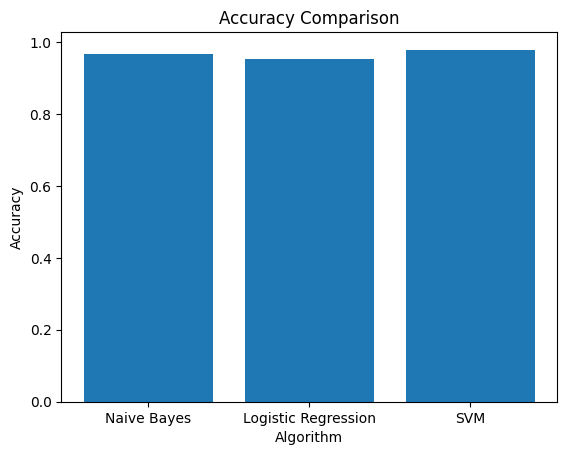

In [29]:
# 7. Plot Accuracy Comparison
plt.figure()
plt.bar(df["Model"], df["Accuracy"])
plt.title("Accuracy Comparison")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.show()


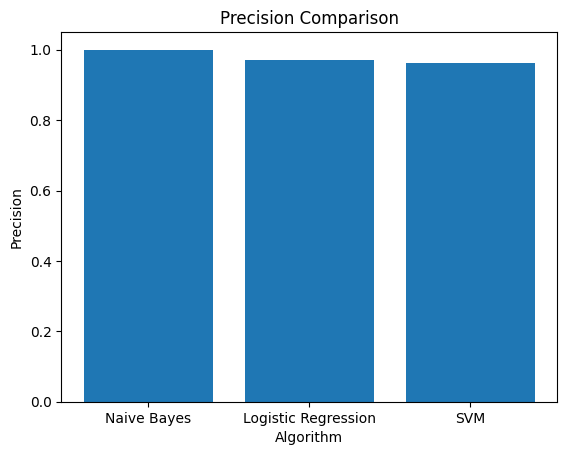

In [31]:
# 8. Plot Precision Comparison
plt.figure()
plt.bar(df["Model"], df["Precision"])
plt.title("Precision Comparison")
plt.xlabel("Algorithm")
plt.ylabel("Precision")
plt.show()



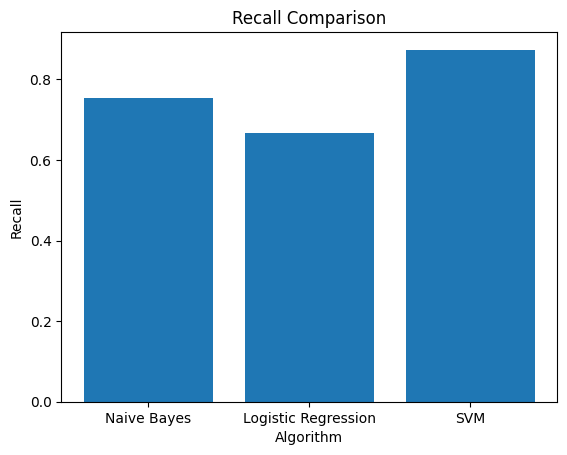

In [33]:
# 9. Plot Recall Comparison
plt.figure()
plt.bar(df["Model"], df["Recall"])
plt.title("Recall Comparison")
plt.xlabel("Algorithm")
plt.ylabel("Recall")
plt.show()


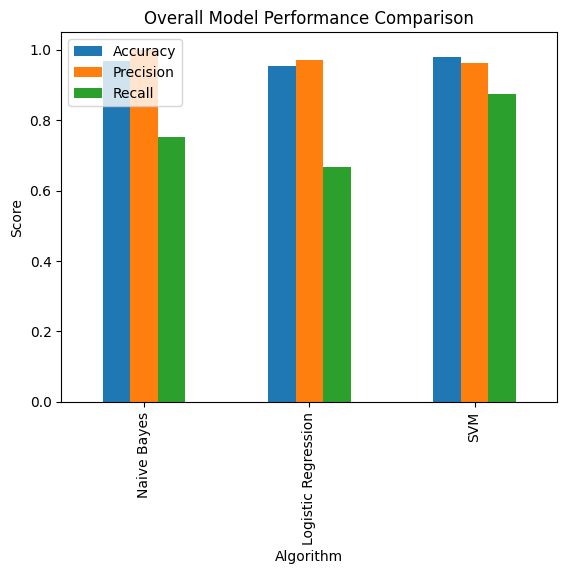

In [35]:
 #10. Combined Performance Plot
df.set_index("Model").plot(kind="bar")
plt.title("Overall Model Performance Comparison")
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.show()


In [43]:
print("Best Model:", max(scores, key=scores.get))

Best Model: SVM
